In [32]:
import pandas as pd
import numpy as np
import os

# pandasai imports
from pandasai.llm.openai import OpenAI
from pandasai import PandasAI

from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score

# scikit llm imports
from skllm.config import SKLLMConfig
from skllm import (
    ZeroShotGPTClassifier,
    FewShotGPTClassifier,
    DynamicFewShotGPTClassifier,
)

from dotenv import load_dotenv

In [2]:
# finds .env file and loads the vars
load_dotenv()
openai_api_key = os.getenv("OPENAI_API_KEY", "Key not found")

# Load data

In [3]:
mirai_flow_df_numeric = pd.read_pickle("../data/blog_eda/mirai_flow_numeric.pkl")
benign_flow_df_numeric = pd.read_pickle("../data/blog_eda/benign_flow_numeric.pkl")

# EDA with Pandas AI

In [4]:
# Instantiate a LLM
llm = OpenAI(api_token=openai_api_key)
pandas_ai = PandasAI(llm)

In [12]:
mirai_clean_df = pandas_ai.run(mirai_flow_df_numeric, prompt="Copy the dataframe to a new variable named df_cleaned. Do data cleaning. Return df_cleaned.")

In [6]:
benign_clean_df = pandas_ai.run(benign_flow_df_numeric, prompt="Copy the dataframe to a new variable named df_cleaned. Do data cleaning. Return df_cleaned.")


In [7]:
mirai_clean_df

,Source Port,Destination Port,Protocol,Number of Packets,Total Length,Duration,Source IP Numeric,Destination IP Numeric
0,68,67,17,27,4482,6131.120998,0,4294967295
1,23,21897,6,1432,37232,2375.572448,3232236033,3232236142
2,23,46734,6,30,780,47.907811,3232236033,3232236142
3,23,50364,6,75,1950,122.722774,3232236033,3232236142
4,23,52777,6,20,520,31.410413,3232236033,3232236142
...,...,...,...,...,...,...,...,...
36580,52413,123,17,1,56,0.000000,3232236228,3349498891
36581,33119,123,17,1,56,0.000000,3232236228,3632630861
36582,42414,123,17,1,56,0.000000,3232236228,3632630861
36583,49134,123,17,1,56,0.000000,3232236228,1123232514


In [8]:
benign_clean_df

,Source Port,Destination Port,Protocol,Number of Packets,Total Length,Duration,Source IP Numeric,Destination IP Numeric
0,68,67,17,9,2945,1.766763e+08,0,4294967295
1,53,61696,17,1,88,0.000000e+00,16843009,2886738307
2,53,33538,17,1,92,0.000000e+00,16843009,3232236373
3,53,34035,17,1,111,0.000000e+00,16843009,3232236373
4,53,39653,17,1,110,0.000000e+00,16843009,3232236373
...,...,...,...,...,...,...,...,...
1684,500,500,17,13,3528,4.310492e+02,1574750820,1352297700
1685,123,123,17,17,952,5.198236e+02,1585590714,3232246283
1686,500,500,17,18,4738,4.338344e+02,1601469645,1352297700
1687,53,26323,17,1,123,0.000000e+00,1632267530,3232237365


In [13]:
top_5_source_IPs = pandas_ai(
    mirai_clean_df, prompt="Which are the 5 most popular source IP addresses?"
)
top_5_source_IPs

,Source IP Numeric,Count
9,3232236142,6361
11,3232236144,6247
8,3232236141,5483
13,3232236147,3752
12,3232236145,3667


In [14]:
top_5_dst_ports = pandas_ai(
    mirai_clean_df, prompt="Which are the 5 most popular destination ports?"
)
top_5_dst_ports

,Destination Port,Count
1,53.0,19427
4,80.0,6919
8,443.0,1678
3361,8280.0,1547
3357,8000.0,1385


Traceback (most recent call last):
  File "/home/drx/sandbox/cyber-ml/.venv/lib/python3.10/site-packages/pandasai/smart_datalake/__init__.py", line 314, in chat
    result = self._code_manager.execute_code(
  File "/home/drx/sandbox/cyber-ml/.venv/lib/python3.10/site-packages/pandasai/helpers/code_manager.py", line 199, in execute_code
    return analyze_data(self._get_original_dfs())
  File "<string>", line 7, in analyze_data
  File "/home/drx/sandbox/cyber-ml/.venv/lib/python3.10/site-packages/matplotlib/pyplot.py", line 1023, in savefig
    res = fig.savefig(*args, **kwargs)
  File "/home/drx/sandbox/cyber-ml/.venv/lib/python3.10/site-packages/matplotlib/figure.py", line 3343, in savefig
    self.canvas.print_figure(fname, **kwargs)
  File "/home/drx/sandbox/cyber-ml/.venv/lib/python3.10/site-packages/matplotlib/backend_bases.py", line 2366, in print_figure
    result = print_method(
  File "/home/drx/sandbox/cyber-ml/.venv/lib/python3.10/site-packages/matplotlib/backend_bases.py", 

"Unfortunately, I was not able to answer your question, because of the following error:\n\n[Errno 2] No such file or directory: 'exports/charts/temp_chart.png'\n"

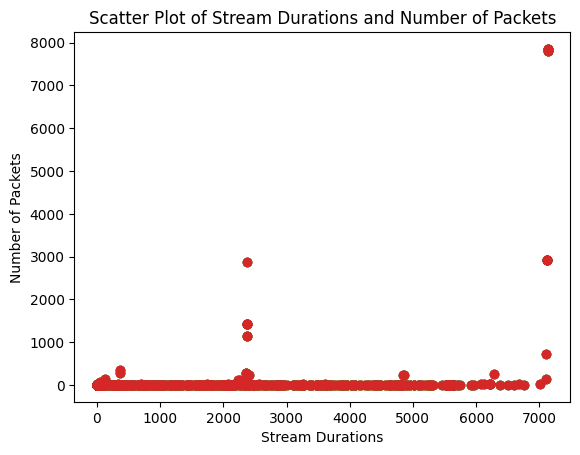

In [15]:
pandas_ai.run(
    mirai_clean_df,
    prompt="Plot the scatter plot of stream durations and number of packets.",
)

Traceback (most recent call last):
  File "/home/drx/sandbox/cyber-ml/.venv/lib/python3.10/site-packages/pandasai/smart_datalake/__init__.py", line 314, in chat
    result = self._code_manager.execute_code(
  File "/home/drx/sandbox/cyber-ml/.venv/lib/python3.10/site-packages/pandasai/helpers/code_manager.py", line 199, in execute_code
    return analyze_data(self._get_original_dfs())
  File "<string>", line 9, in analyze_data
  File "/home/drx/sandbox/cyber-ml/.venv/lib/python3.10/site-packages/matplotlib/pyplot.py", line 1023, in savefig
    res = fig.savefig(*args, **kwargs)
  File "/home/drx/sandbox/cyber-ml/.venv/lib/python3.10/site-packages/matplotlib/figure.py", line 3343, in savefig
    self.canvas.print_figure(fname, **kwargs)
  File "/home/drx/sandbox/cyber-ml/.venv/lib/python3.10/site-packages/matplotlib/backend_bases.py", line 2366, in print_figure
    result = print_method(
  File "/home/drx/sandbox/cyber-ml/.venv/lib/python3.10/site-packages/matplotlib/backend_bases.py", 

'Unfortunately, I was not able to answer your question, because of the following error:\n\nHTTP code 502 from API (<html>\r\n<head><title>502 Bad Gateway</title></head>\r\n<body>\r\n<center><h1>502 Bad Gateway</h1></center>\r\n<hr><center>cloudflare</center>\r\n</body>\r\n</html>\r\n)\n'

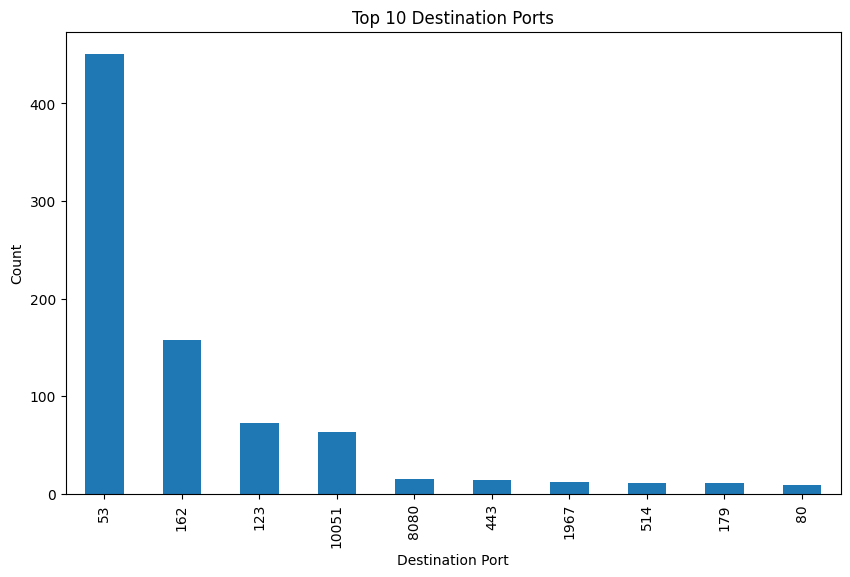

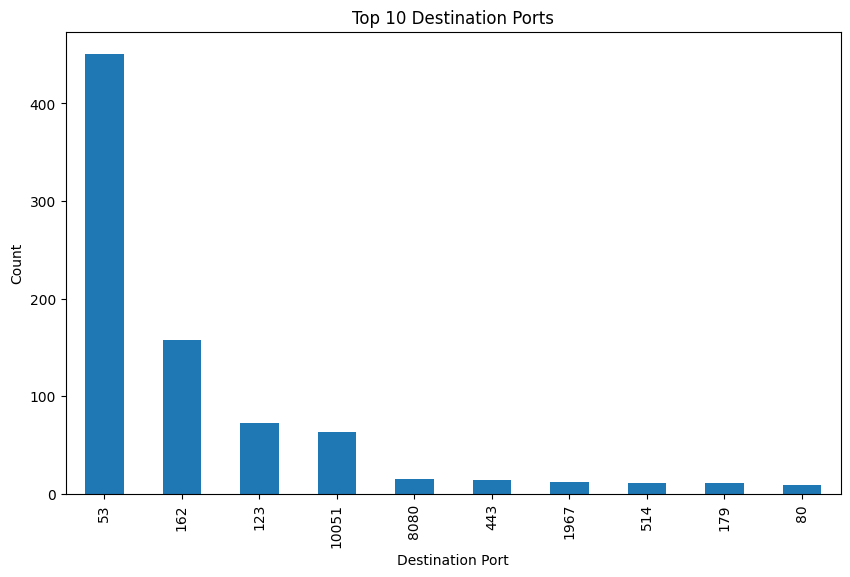

In [16]:
pandas_ai.run(benign_clean_df, prompt="Plot a barplot of top 10 destination ports.")


# Feature Engineering with Pandas AI

In [19]:
mirai_cleaned_df.generate_features()

,Source Port,Destination Port,Protocol,Number of Packets,Total Length,Duration,Source IP Numeric,Destination IP Numeric,Total Packets,Average Packet Length,Bytes per Second
0,68,67,17,27,4482,6131.120998,0,4294967295,27,166.0,0.731025
1,23,21897,6,1432,37232,2375.572448,3232236033,3232236142,1432,26.0,15.672854
2,23,46734,6,30,780,47.907811,3232236033,3232236142,30,26.0,16.281270
3,23,50364,6,75,1950,122.722774,3232236033,3232236142,75,26.0,15.889471
4,23,52777,6,20,520,31.410413,3232236033,3232236142,20,26.0,16.555020
...,...,...,...,...,...,...,...,...,...,...,...
36580,52413,123,17,1,56,0.000000,3232236228,3349498891,1,56.0,inf
36581,33119,123,17,1,56,0.000000,3232236228,3632630861,1,56.0,inf
36582,42414,123,17,1,56,0.000000,3232236228,3632630861,1,56.0,inf
36583,49134,123,17,1,56,0.000000,3232236228,1123232514,1,56.0,inf


In [20]:
benign_clean_df.generate_features()

,Source Port,Destination Port,Protocol,Number of Packets,Total Length,Duration,Source IP Numeric,Destination IP Numeric,Packet Length
0,68,67,17,9,2945,1.766763e+08,0,4294967295,327.222222
1,53,61696,17,1,88,0.000000e+00,16843009,2886738307,88.000000
2,53,33538,17,1,92,0.000000e+00,16843009,3232236373,92.000000
3,53,34035,17,1,111,0.000000e+00,16843009,3232236373,111.000000
4,53,39653,17,1,110,0.000000e+00,16843009,3232236373,110.000000
...,...,...,...,...,...,...,...,...,...
1684,500,500,17,13,3528,4.310492e+02,1574750820,1352297700,271.384615
1685,123,123,17,17,952,5.198236e+02,1585590714,3232246283,56.000000
1686,500,500,17,18,4738,4.338344e+02,1601469645,1352297700,263.222222
1687,53,26323,17,1,123,0.000000e+00,1632267530,3232237365,123.000000


# Labeling
We label and concatenate benign and malicious before one-hot because there are different ports in each dataset and concatenating the two after one hot will not work with different columns.

In [23]:
mirai_df = pd.read_pickle("../data/blog_eda/mirai.pkl")
benign_df = pd.read_pickle("../data/blog_eda/benign.pkl")

In [24]:
# add labels, 0 for benign, 1 for malicious
mirai_df["Labels"] = 1
benign_df["Labels"] = 0

In [25]:
mirai_payloads = mirai_df[["Payload", "Labels"]]
benign_payloads = benign_df[["Payload", "Labels"]]

In [26]:
payloads = pd.concat([mirai_payloads, benign_payloads], ignore_index=True)


# AI Classifier

In [38]:
payloads_subset = payloads.sample(n=100, random_state=1)

X_llm = payloads_subset["Payload"]
y_llm = payloads_subset["Labels"]

In [36]:
SKLLMConfig.set_openai_key(openai_api_key)
SKLLMConfig.set_openai_org("org-HlcxSARQUphcO0tUGmtJJOpD")

In [39]:
clf = ZeroShotGPTClassifier(openai_model="gpt-3.5-turbo")
clf.fit(X_llm, y_llm)
labels = clf.predict(X_llm)

print(f"Accuracy: {accuracy_score(y_llm, labels):.2f}")

100%|██████████| 100/100 [00:52<00:00,  1.92it/s]

Accuracy: 0.89


In [40]:
clf = FewShotGPTClassifier(openai_model="gpt-3.5-turbo")
clf.fit(X_llm, y_llm)
labels = clf.predict(X_llm)
print(f"Accuracy: {accuracy_score(y_llm, labels):.2f}")

100%|██████████| 100/100 [01:39<00:00,  1.00it/s]

Accuracy: 0.94
